# WeatherPy

## Starter Code to Generate Random Geographic Coordinate and a List of Cities

In [7]:
#Dependicies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import the OpenWeatherMap API key
from api_keys import weather_api_key

#Import citipy to determine the cities based on Latitude and Longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [12]:
#Empty list for holding the latitude and longitude combinations
lat_lngs = []

#Empty list for holding the cities names
cities = []

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the start code 

In [23]:
#Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval           ")
print("-----------------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    #Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #create endpoint URL with each city
    city_url = url + city
    
    #log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    #add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city information into city_data list
        city_data.append({
                        "City": city,
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date
                        })
        
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
#Indicate that data loading is complete
print("-----------------------------------")
print("Data Retrieval Complete            ")
print("-----------------------------------")
    

Beginning Data Retrieval           
-----------------------------------
Processing Record 1 of Set 1 | huicungo
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | boa vista
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | pontianak
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | pont rouge
Processing Record 40 of Set 4 | keflavik
Processing Record 41 of Set 4 | myingyan
Processing Record 42 of Set 4 | acarau
Processing Record 43 of Set 4 | cristalina
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | taupo
Processing Record 46 of Set 4 | utrik
Processing Record 47 of Set 4 | onega
Processing Record 48 of Set 4 | maria aurora
Processing Record 49 of Set 4 | charleston
Processing Record 0 of Set 5 | reggane
Processing Record 1 of Set 5 | kingston
Processing Record 2 of Set 5 | atafu village
Processing Record 3 of Set 5 | palu
Processing Record 4 of Set 5 | crane
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | rio tuba
Processing Record 7 of Set 5 | ghat
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | lhasa
Processing Record 10 of Set 5 | rikaze
Processing Record 11 of Set 5 | conception bay south
Processing Record 12 of Set 5 | nuuk
Processing Record 13 of

Processing Record 34 of Set 8 | dickson
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | raja
Processing Record 37 of Set 8 | fort scott
Processing Record 38 of Set 8 | am djarass
City not found. Skipping...
Processing Record 39 of Set 8 | magadan
Processing Record 40 of Set 8 | sokhumi
Processing Record 41 of Set 8 | belyy yar
Processing Record 42 of Set 8 | teguise
Processing Record 43 of Set 8 | marion
Processing Record 44 of Set 8 | salair
Processing Record 45 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 8 | ostersund
Processing Record 47 of Set 8 | gaalkacyo
Processing Record 48 of Set 8 | nicoya
Processing Record 49 of Set 8 | nizhniy odes
Processing Record 0 of Set 9 | ayr
Processing Record 1 of Set 9 | huetamo de nunez
Processing Record 2 of Set 9 | brigham city
Processing Record 3 of Set 9 | itaituba
Processing Record 4 of Set 9 | maubara
City not found. Skipping...
Processing Record 5 of Set 9 | la passe
Processing Record

Processing Record 20 of Set 12 | masterton
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | mandalgovi
Processing Record 23 of Set 12 | nikolayevsk-on-amure
Processing Record 24 of Set 12 | katsuura
Processing Record 25 of Set 12 | rizhao
Processing Record 26 of Set 12 | aleysk
Processing Record 27 of Set 12 | brookings
Processing Record 28 of Set 12 | walvis bay
Processing Record 29 of Set 12 | pandhana
Processing Record 30 of Set 12 | kamaishi
Processing Record 31 of Set 12 | huatabampo
Processing Record 32 of Set 12 | amos
Processing Record 33 of Set 12 | taltal
Processing Record 34 of Set 12 | diu
Processing Record 35 of Set 12 | nieul-sur-mer
Processing Record 36 of Set 12 | hue
Processing Record 37 of Set 12 | timbiras
Processing Record 38 of Set 12 | lembar
City not found. Skipping...
Processing Record 39 of Set 12 | hadibu
Processing Record 40 of Set 12 | kalmunai
Processing Record 41 of Set 12 | mumford
Processing Record 42 of Set 12 | ho

In [40]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show record count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [41]:
#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huicungo,-7.2833,-76.8000,20.12,99,100,0.51,PE,1683973768
1,thompson,55.7435,-97.8558,-1.91,93,40,0.00,CA,1683973769
2,nagqu,31.5000,92.0000,2.02,36,100,5.48,CN,1683973770
3,touros,-5.1989,-35.4608,26.38,79,92,2.07,BR,1683973772
4,puerto natales,-51.7236,-72.4875,2.47,92,100,1.17,CL,1683973773


In [42]:
#Export the city_data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
#Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huicungo,-7.2833,-76.8000,20.12,99,100,0.51,PE,1683973768
1,thompson,55.7435,-97.8558,-1.91,93,40,0.00,CA,1683973769
2,nagqu,31.5000,92.0000,2.02,36,100,5.48,CN,1683973770
3,touros,-5.1989,-35.4608,26.38,79,92,2.07,BR,1683973772
4,puerto natales,-51.7236,-72.4875,2.47,92,100,1.17,CL,1683973773


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

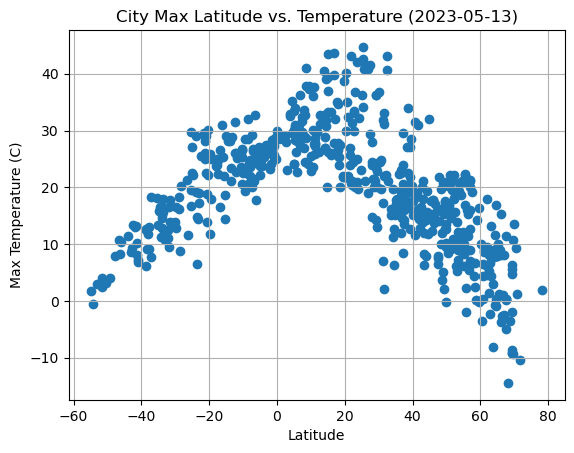

In [46]:
#Build scatter plt for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature)

#Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-13)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plt
plt.show()

#### Latitude Vs. Humidity

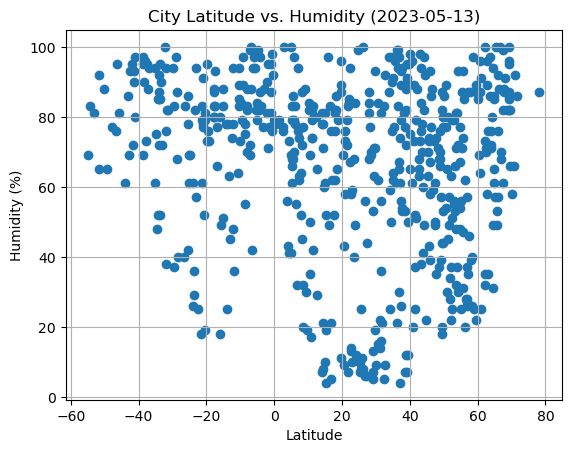

In [48]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

#Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-05-13)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

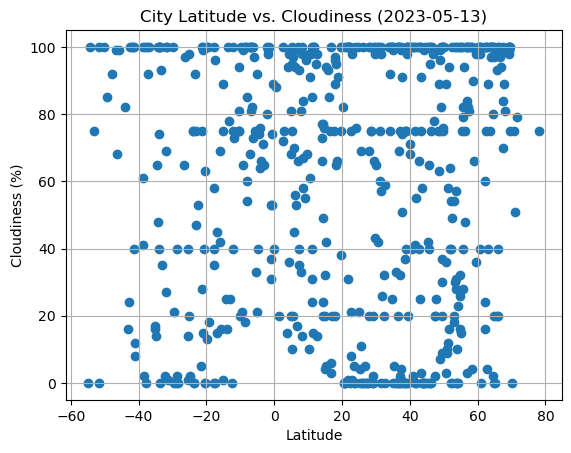

In [49]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

#Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-05-13)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

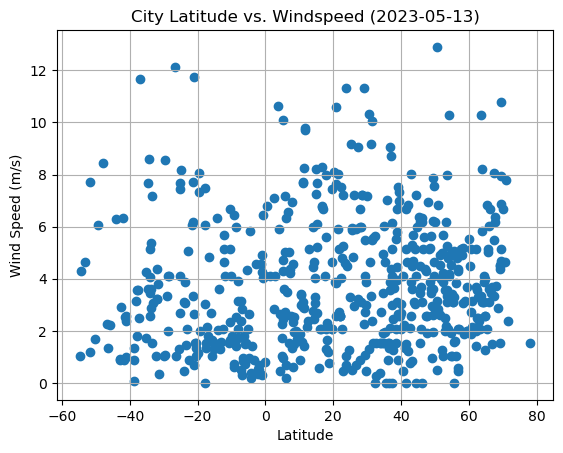

In [50]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

#Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (2023-05-13)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

### Requirement 2: Compute Linear Regression for Each Relationship

In [127]:
#Define a function to create Linear Regression plots
def line_regress(Lat, comparison_data):
    weather_slope, weather_int, weather_r, weather_p, weather_std_err = linregress(Lat, comparison_data)
    print(f"The r-value is: {weather_r**2}")
    reg_values = Lat * weather_slope + weather_int
    line_eq = "y = " + str(round(weather_slope, 2)) + "x + " + str(round(weather_int, 2))
    plt.plot(Lat, reg_values, color="red")
    plt.annotate(line_eq, plot_loc, fontsize=12, color="red")

   

In [113]:
 #weather_slope, weather_int, weather_r, weather_p, weather_std_err = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
#Lat = city_data_df["Lat"]
#comparison_data = city_data_df["Max Temp"]
#line_regress(Lat, comparison_data) 

In [98]:
#Create a DataFrame with the Northern Hemisphere data (Latitiude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] >= 0)])

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,-1.91,93,40,0.00,CA,1683973769
2,nagqu,31.5000,92.0000,2.02,36,100,5.48,CN,1683973770
6,constantia,44.1833,28.6500,19.38,49,99,3.02,RO,1683973775
7,iskateley,67.6803,53.1512,0.18,88,99,6.38,RU,1683973776
9,boa vista,2.8197,-60.6733,22.99,100,75,4.12,BR,1683973780


In [99]:
#Create a DataFrame with the Southern Hemisphere data (Latitiude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] < 0)])

#Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huicungo,-7.2833,-76.8000,20.12,99,100,0.51,PE,1683973768
3,touros,-5.1989,-35.4608,26.38,79,92,2.07,BR,1683973772
4,puerto natales,-51.7236,-72.4875,2.47,92,100,1.17,CL,1683973773
5,blackmans bay,-43.0167,147.3167,8.62,86,16,0.88,AU,1683973774
8,edinburgh of the seven seas,-37.0676,-12.3116,18.35,94,100,11.67,SH,1683973778


### Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6413816725224178


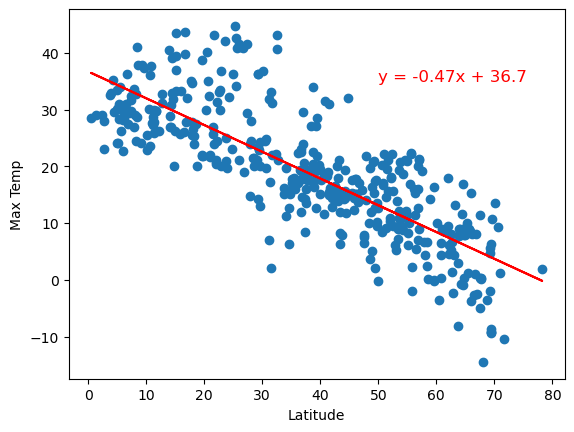

In [128]:
#Linear regression on Northern Hemisphere
Lat = northern_hemi_df["Lat"]
comparison_data = northern_hemi_df["Max Temp"]
plot_loc = (50,35)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


#Show plt
plt.show()

The r-value is: 0.6923534356026164


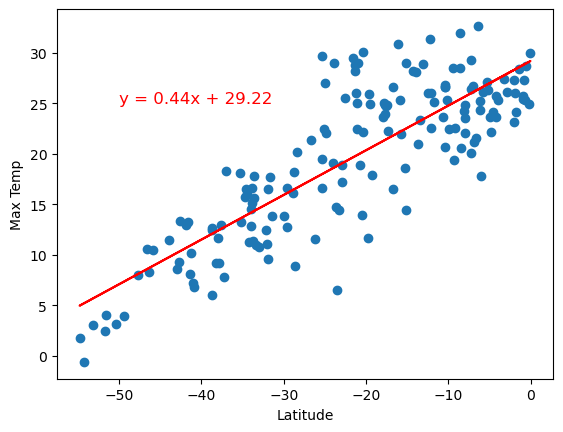

In [129]:
#Linear regression on Southern Hemisphere
Lat = southern_hemi_df["Lat"]
comparison_data = southern_hemi_df["Max Temp"]
plot_loc = (-50, 25)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


#Show plt
plt.show()

#### Discussion about the linear relationship:


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011292813802266058


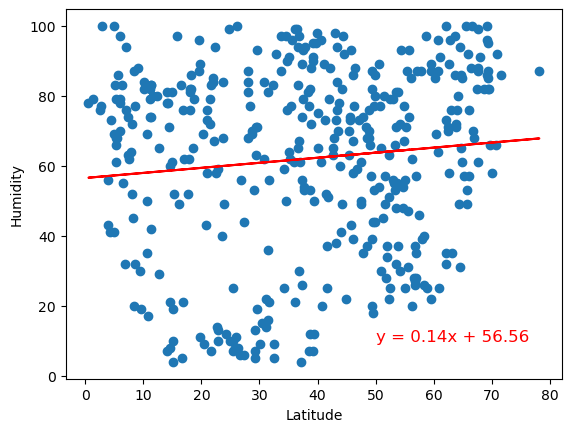

In [130]:
#Northern Hemisphere
Lat = northern_hemi_df["Lat"]
comparison_data = northern_hemi_df["Humidity"]
plot_loc = (50, 10)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Show plt
plt.show()

The r-value is: 0.001107816725524932


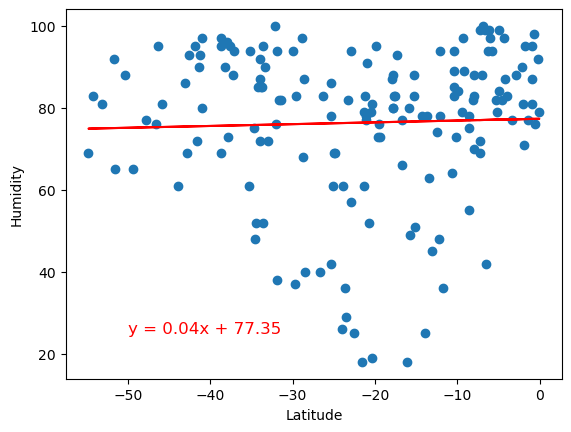

In [131]:
#Southern Hemisphere
Lat = southern_hemi_df["Lat"]
comparison_data = southern_hemi_df["Humidity"]
plot_loc = (-50, 25)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#Show plt
plt.show()

#### Discussion about the linear relationship:

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005730751265732247


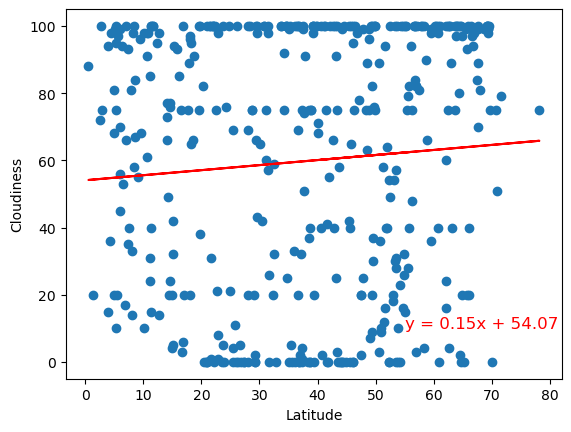

In [132]:
#Northern Hemisphere
Lat = northern_hemi_df["Lat"]
comparison_data = northern_hemi_df["Cloudiness"]
plot_loc = (55, 10)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Show plt
plt.show()

The r-value is: 0.0063396877077568714


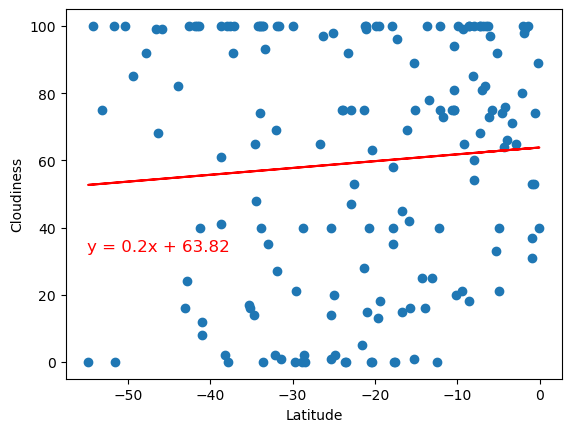

In [133]:
#Southern Hemisphere
Lat = southern_hemi_df["Lat"]
comparison_data = southern_hemi_df["Cloudiness"]
plot_loc = (-55, 33)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#Show plt
plt.show()

#### Discussion about the linear relationship:

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00030277716207030174


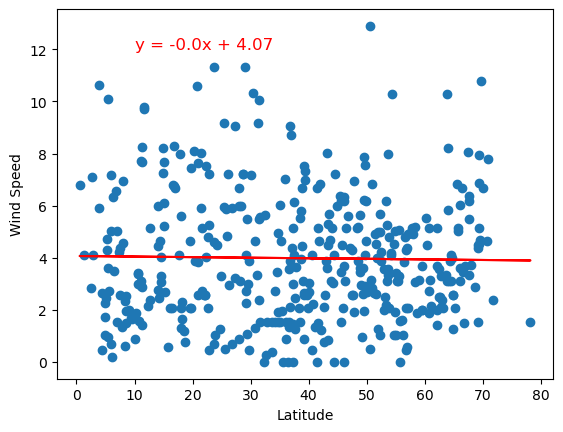

In [134]:
#Northern Hemisphere
Lat = northern_hemi_df["Lat"]
comparison_data = northern_hemi_df["Wind Speed"]
plot_loc = (10, 12)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Show plt
plt.show()

The r-value is: 0.024965915153544505


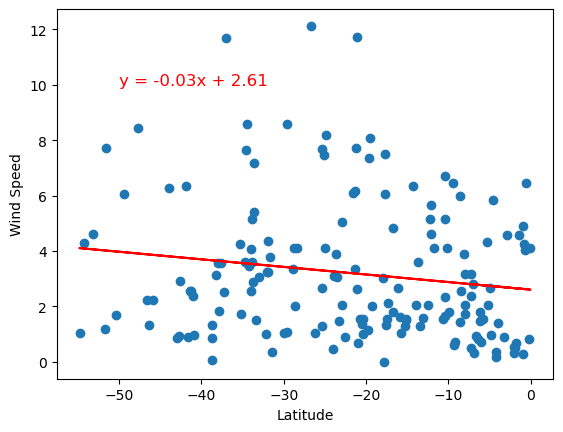

In [135]:
#Southern Hemisphere
Lat = southern_hemi_df["Lat"]
comparison_data = southern_hemi_df["Wind Speed"]
plot_loc = (-50, 10)

plt.scatter(Lat, comparison_data)

line_regress(Lat, comparison_data)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


#Show plt
plt.show()

#### Discussion about the linear relationship: 